In [1]:
!pip install pillow pandas

In [4]:
import os
from PIL import Image
import pandas as pd
from collections import Counter

def get_dominant_colors(image_path, num_colors=100):
    try:
        # Abrir la imagen
        image = Image.open(image_path)
        image = image.convert('RGB')
        
        # Redimensionar la imagen para acelerar el procesamiento
        image = image.resize((150, 150))
        
        # Obtener los colores de la imagen
        colors = image.getcolors(image.size[0] * image.size[1])
        
        if colors is None:
            print(f"Warning: No colors found in {image_path}")
            return []
        
        # Contar los colores
        color_counts = Counter(dict(colors))
        
        # Obtener los colores más comunes
        most_common_colors = color_counts.most_common(num_colors)
        
        return most_common_colors
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return []

def process_posters(directory):
    data = []
    
    # Recorrer cada carpeta de año
    for year_folder in os.listdir(directory):
        year_path = os.path.join(directory, year_folder)
        
        if os.path.isdir(year_path):
            print(f"Processing folder: {year_path}")
            # Recorrer cada imagen en la carpeta del año
            for poster in os.listdir(year_path):
                poster_path = os.path.join(year_path, poster)
                
                if poster_path.lower().endswith('.jpg'):
                    print(f"Processing image: {poster_path}")
                    # Obtener los colores predominantes
                    dominant_colors = get_dominant_colors(poster_path)
                    
                    # Agregar los datos a la lista
                    for color, count in dominant_colors:
                        hex_color = '#{:02x}{:02x}{:02x}'.format(color[0], color[1], color[2])
                        data.append([hex_color, count, int(year_folder)])
    
    print(f"Collected data for {len(data)} colors.")
    return data

# Directorio que contiene las carpetas de los años
directory = r'C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters'

# Procesar los posters
data = process_posters(directory)

# Crear un DataFrame y calcular la frecuencia de cada color en porcentaje
if data:
    df = pd.DataFrame(data, columns=['Color', 'Count', 'Year'])
    df['Percentage'] = df.groupby('Year')['Count'].apply(lambda x: 100 * x / x.sum())

    # Guardar el DataFrame en un archivo CSV
    df.to_csv('dominant_colors.csv', index=False)
    print("CSV file created successfully.")
else:
    print("No data to write to CSV.")

Processing folder: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters
Collected data for 0 colors.
No data to write to CSV.


In [8]:
import os
from PIL import Image
import pandas as pd
from collections import Counter

def get_dominant_colors(image_path, num_colors=100):
    try:
        # Abrir la imagen
        image = Image.open(image_path)
        image = image.convert('RGB')
        
        # Redimensionar la imagen para acelerar el procesamiento
        image = image.resize((150, 150))
        
        # Obtener los colores de la imagen
        colors = image.getcolors(image.size[0] * image.size[1])
        
        if colors is None:
            print(f"Warning: No colors found in {image_path}")
            return []
        
        # Contar los colores
        color_counts = Counter(dict(colors))
        
        # Obtener los colores más comunes
        most_common_colors = color_counts.most_common(num_colors)
        
        return most_common_colors
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return []

def process_posters(directory):
    data = []
    
    if not os.path.exists(directory):
        print(f"Error: The directory {directory} does not exist.")
        return data
    
    # Recorrer cada imagen en la carpeta del año
    for poster in os.listdir(directory):
        poster_path = os.path.join(directory, poster)
        
        if poster_path.lower().endswith('.jpg'):
            print(f"Processing image: {poster_path}")
            # Obtener los colores predominantes
            dominant_colors = get_dominant_colors(poster_path)
            
            # Agregar los datos a la lista
            for item in dominant_colors:
                count, color = item
                if isinstance(color, tuple) and len(color) == 3:
                    hex_color = '#{:02x}{:02x}{:02x}'.format(color[0], color[1], color[2])
                    data.append([hex_color, count, 1994])
    
    print(f"Collected data for {len(data)} colors.")
    return data

# Directorio que contiene la carpeta del año 1994
directory = r'C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994'

# Procesar los posters
data = process_posters(directory)

# Crear un DataFrame y calcular la frecuencia de cada color en porcentaje
if data:
    df = pd.DataFrame(data, columns=['Color', 'Count', 'Year'])
    df['Percentage'] = df['Count'] / df.groupby('Year')['Count'].transform('sum') * 100

    # Guardar el DataFrame en un archivo CSV
    df.to_csv('dominant_colors_1994.csv', index=False)
    print("CSV file created successfully.")
else:
    print("No data to write to CSV.")

Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\3 Ninjas Kick Back.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\6 Days 6 Nights.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\8 Seconds.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\A Confucian Confusion.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\A Feast At Midnight.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\A Friend to Die For.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\A Man of No Importance.jpg
Processing image: C:\Users\cosme\OneDrive\Es

In [9]:
import os
from PIL import Image
import pandas as pd
from collections import Counter

def get_dominant_color(image_path):
    try:
        # Abrir la imagen
        image = Image.open(image_path)
        image = image.convert('RGB')
        
        # Redimensionar la imagen para acelerar el procesamiento
        image = image.resize((50, 50))  # Reducir aún más para obtener el color dominante
        
        # Obtener los colores de la imagen
        colors = image.getcolors(image.size[0] * image.size[1])
        
        # Obtener el color más común
        dominant_color = max(colors, key=lambda x: x[0])[1]
        
        return dominant_color
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def process_posters(directory):
    color_counts = Counter()
    
    if not os.path.exists(directory):
        print(f"Error: The directory {directory} does not exist.")
        return color_counts
    
    # Recorrer cada imagen en la carpeta del año
    for poster in os.listdir(directory):
        poster_path = os.path.join(directory, poster)
        
        if poster_path.lower().endswith('.jpg'):
            print(f"Processing image: {poster_path}")
            # Obtener el color dominante
            dominant_color = get_dominant_color(poster_path)
            
            if dominant_color:
                hex_color = '#{:02x}{:02x}{:02x}'.format(dominant_color[0], dominant_color[1], dominant_color[2])
                color_counts[hex_color] += 1
    
    return color_counts

# Directorio que contiene la carpeta del año 1994
directory = r'C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994'

# Procesar los posters
color_counts = process_posters(directory)

# Obtener los 100 colores más usados
most_common_colors = color_counts.most_common(100)

# Crear un DataFrame
df = pd.DataFrame(most_common_colors, columns=['Color', 'Count'])

# Calcular la frecuencia en porcentaje
total_count = df['Count'].sum()
df['Percentage'] = df['Count'] / total_count * 100
df['Year'] = 1994

# Guardar el DataFrame en un archivo CSV
df.to_csv('dominant_colors_1994.csv', index=False)
print("CSV file created successfully.")

Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\3 Ninjas Kick Back.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\6 Days 6 Nights.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\8 Seconds.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\A Confucian Confusion.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\A Feast At Midnight.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\A Friend to Die For.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\A Man of No Importance.jpg
Processing image: C:\Users\cosme\OneDrive\Es

In [11]:
import os
from PIL import Image
import pandas as pd
from collections import Counter

def get_dominant_color(image_path):
    try:
        # Abrir la imagen
        image = Image.open(image_path)
        image = image.convert('RGB')
        
        # Redimensionar la imagen para acelerar el procesamiento
        image = image.resize((50, 50))  # Reducir aún más para obtener el color dominante
        
        # Obtener los colores de la imagen
        colors = image.getcolors(image.size[0] * image.size[1])
        
        # Obtener el color más común
        dominant_color = max(colors, key=lambda x: x[0])[1]
        
        return dominant_color
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def process_posters(directory):
    color_counts = Counter()
    
    if not os.path.exists(directory):
        print(f"Error: The directory {directory} does not exist.")
        return color_counts
    
    # Recorrer cada imagen en la carpeta del año
    for poster in os.listdir(directory):
        poster_path = os.path.join(directory, poster)
        
        if poster_path.lower().endswith('.jpg'):
            print(f"Processing image: {poster_path}")
            # Obtener el color dominante
            dominant_color = get_dominant_color(poster_path)
            
            if dominant_color:
                hex_color = '#{:02x}{:02x}{:02x}'.format(dominant_color[0], dominant_color[1], dominant_color[2])
                color_counts[hex_color] += 1
    
    return color_counts

# Directorio que contiene la carpeta del año 1994
directory = r'C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994'

# Procesar los posters
color_counts = process_posters(directory)

# Obtener los 100 colores más usados
most_common_colors = color_counts.most_common(100)

# Crear un DataFrame
df = pd.DataFrame(most_common_colors, columns=['Color', 'Count'])

# Calcular la frecuencia en porcentaje
total_count = df['Count'].sum()
df['Percentage'] = df['Count'] / total_count * 100
df['Year'] = 1994

# Guardar el DataFrame en un archivo CSV
df.to_csv('1994.csv', index=False)
print("CSV file created successfully.")

Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\3 Ninjas Kick Back.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\6 Days 6 Nights.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\8 Seconds.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\A Confucian Confusion.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\A Feast At Midnight.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\A Friend to Die For.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1994\A Man of No Importance.jpg
Processing image: C:\Users\cosme\OneDrive\Es

In [ ]:
import os
from PIL import Image
import pandas as pd
from collections import Counter

def get_dominant_color(image_path):
    try:
        # Abrir la imagen
        image = Image.open(image_path)
        image = image.convert('RGB')
        
        # Redimensionar la imagen para acelerar el procesamiento
        image = image.resize((50, 50))  # Reducir aún más para obtener el color dominante
        
        # Obtener los colores de la imagen
        colors = image.getcolors(image.size[0] * image.size[1])
        
        # Obtener el color más común
        dominant_color = max(colors, key=lambda x: x[0])[1]
        
        return dominant_color
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def process_posters(directory):
    color_counts = Counter()
    
    if not os.path.exists(directory):
        print(f"Error: The directory {directory} does not exist.")
        return color_counts
    
    # Recorrer cada imagen en la carpeta del año
    for poster in os.listdir(directory):
        poster_path = os.path.join(directory, poster)
        
        if poster_path.lower().endswith('.jpg'):
            print(f"Processing image: {poster_path}")
            # Obtener el color dominante
            dominant_color = get_dominant_color(poster_path)
            
            if dominant_color:
                hex_color = '#{:02x}{:02x}{:02x}'.format(dominant_color[0], dominant_color[1], dominant_color[2])
                color_counts[hex_color] += 1
    
    return color_counts

# Directorio base que contiene las carpetas de los años
base_directory = r'C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters'

# Rango de años a procesar
start_year = 1995
end_year = 2024

for year in range(start_year, end_year + 1):
    print(f"Processing year: {year}")
    year_directory = os.path.join(base_directory, str(year))
    
    # Procesar los posters del año actual
    color_counts = process_posters(year_directory)
    
    if color_counts:
        # Obtener los 100 colores más usados
        most_common_colors = color_counts.most_common(100)

        # Crear un DataFrame
        df = pd.DataFrame(most_common_colors, columns=['Color', 'Count'])

        # Calcular la frecuencia en porcentaje
        total_count = df['Count'].sum()
        df['Percentage'] = df['Count'] / total_count * 100
        df['Year'] = year

        # Guardar el DataFrame en un archivo CSV
        output_filename = f'dominant_colors_{year}.csv'
        df.to_csv(output_filename, index=False)
        print(f"CSV file for year {year} created successfully.")
    else:
        print(f"No data to write to CSV for year {year}.")

Processing year: 1995
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1995\...And the Earth Did Not Swallow Him.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1995\301302.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1995\A Fistful of Fingers.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1995\A Kid in King Arthurs Court.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1995\A Little Princess.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1995\A Pyromaniacs Love Story.jpg
Processing image: C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters\1995\A Walk in the Clouds

In [13]:
import os
import pandas as pd

# Directorio que contiene los archivos CSV de cada año
csv_directory = r'C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\posters_csv'

# Lista para almacenar los DataFrames
dataframes = []

# Recorrer cada archivo en el directorio
for file in os.listdir(csv_directory):
    if file.endswith('.csv'):
        file_path = os.path.join(csv_directory, file)
        print(f"Reading {file_path}")
        # Leer el CSV y agregarlo a la lista de DataFrames
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
combined_df = pd.concat(dataframes, ignore_index=True)

# Guardar el DataFrame combinado en un único archivo CSV
output_file = r'C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\posters\combined_dominant_colors.csv'
combined_df.to_csv(output_file, index=False)

print(f"Combined CSV file created successfully at {output_file}")

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\Users\\cosme\\OneDrive\\Escritorio\\DATA ELISAVA\\proyecto con el tito cosme\\posters\\posters_csv'

In [15]:
import os
import pandas as pd

# Directorio que contiene los archivos CSV de cada año
csv_directory = r'C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\proyecto con el tito cosme\CSV'

# Lista para almacenar los DataFrames
dataframes = []

# Verificar si la ruta existe
if not os.path.exists(csv_directory):
    print(f"Error: The directory {csv_directory} does not exist.")
else:
    # Recorrer cada archivo en el directorio
    for file in os.listdir(csv_directory):
        if file.endswith('.csv'):
            file_path = os.path.join(csv_directory, file)
            print(f"Reading {file_path}")
            # Leer el CSV y agregarlo a la lista de DataFrames
            df = pd.read_csv(file_path)
            dataframes.append(df)

    # Concatenar todos los DataFrames en uno solo
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Guardar el DataFrame combinado en un único archivo CSV
    output_file = r'C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\proyecto con el tito cosme\combined_dominant_colors.csv'
    combined_df.to_csv(output_file, index=False)

    print(f"Combined CSV file created successfully at {output_file}")

Reading C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\proyecto con el tito cosme\CSV\dominant_colors_1994.csv
Reading C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\proyecto con el tito cosme\CSV\dominant_colors_1995.csv
Reading C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\proyecto con el tito cosme\CSV\dominant_colors_1996.csv
Reading C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\proyecto con el tito cosme\CSV\dominant_colors_1997.csv
Reading C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\proyecto con el tito cosme\CSV\dominant_colors_1998.csv
Reading C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\proyecto con el tito cosme\CSV\dominant_colors_1999.csv
Reading C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\proyecto con el tito cosme\CSV\dominant_colors_2000.csv
Reading C:\Users\cosme\OneD

In [16]:
import pandas as pd

# Leer el CSV combinado
combined_csv_path = r'C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\proyecto con el tito cosme\combined_dominant_colors.csv'
df = pd.read_csv(combined_csv_path)

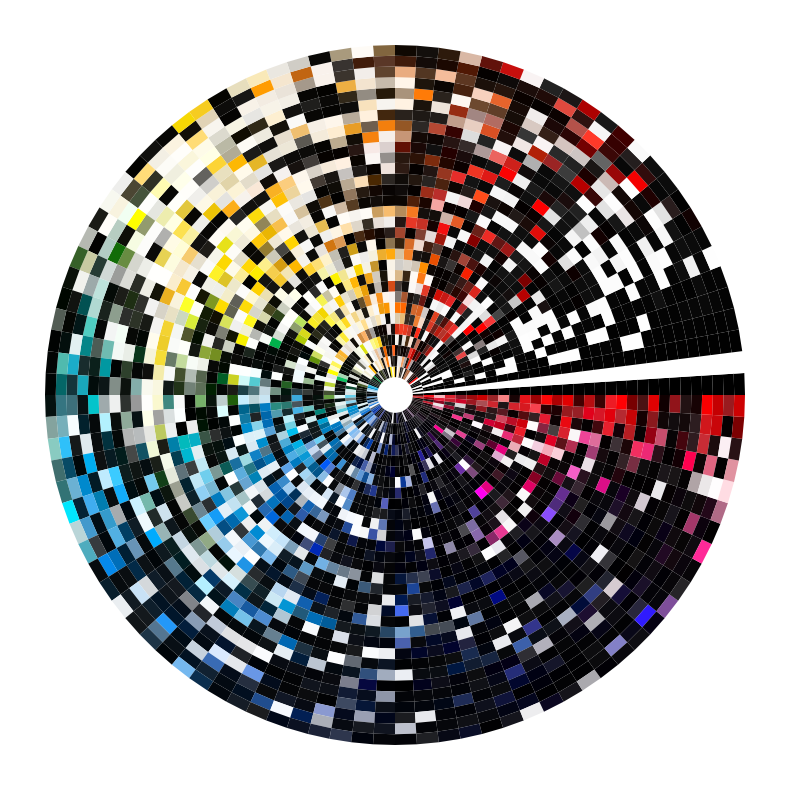

In [18]:
import os
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

# Leer el CSV combinado
combined_csv_path = r'C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\proyecto con el tito cosme\combined_dominant_colors.csv'
df = pd.read_csv(combined_csv_path)

# Convertir colores hexadecimales a HSV y añadir componentes por separado al DataFrame
df['HSV'] = df['Color'].apply(lambda x: mcolors.rgb_to_hsv(mcolors.hex2color(x)))
df['Hue'] = df['HSV'].apply(lambda x: x[0])
df['Saturation'] = df['HSV'].apply(lambda x: x[1])
df['Value'] = df['HSV'].apply(lambda x: x[2])

# Ordenar por año y luego por Hue
df = df.sort_values(by=['Year', 'Hue'])

# Remover las columnas HSV, Saturation y Value después de ordenar
df = df.drop(columns=['HSV', 'Saturation', 'Value'])

# Función para crear los aros de colores
def plot_color_ring(ax, colors, radius, width):
    # Crear los ángulos para cada color
    num_colors = len(colors)
    theta = np.linspace(0, 2 * np.pi, num_colors, endpoint=False)
    
    # Crear el polígono para cada color
    for i, color in enumerate(colors):
        theta1, theta2 = theta[i], theta[(i + 1) % num_colors]
        verts = [
            (radius * np.cos(theta1), radius * np.sin(theta1)),
            ((radius + width) * np.cos(theta1), (radius + width) * np.sin(theta1)),
            ((radius + width) * np.cos(theta2), (radius + width) * np.sin(theta2)),
            (radius * np.cos(theta2), radius * np.sin(theta2)),
            (radius * np.cos(theta1), radius * np.sin(theta1))
        ]
        ax.fill(*zip(*verts), color=color, edgecolor='none')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
ax.axis('off')

# Parámetros de los aros
years = df['Year'].unique()
inner_radius = 0.5
width = 0.3

# Dibujar los aros para cada año
for i, year in enumerate(years):
    colors = df[df['Year'] == year]['Color'].tolist()
    plot_color_ring(ax, colors, inner_radius + i * width, width)

# Mostrar el gráfico
plt.show()

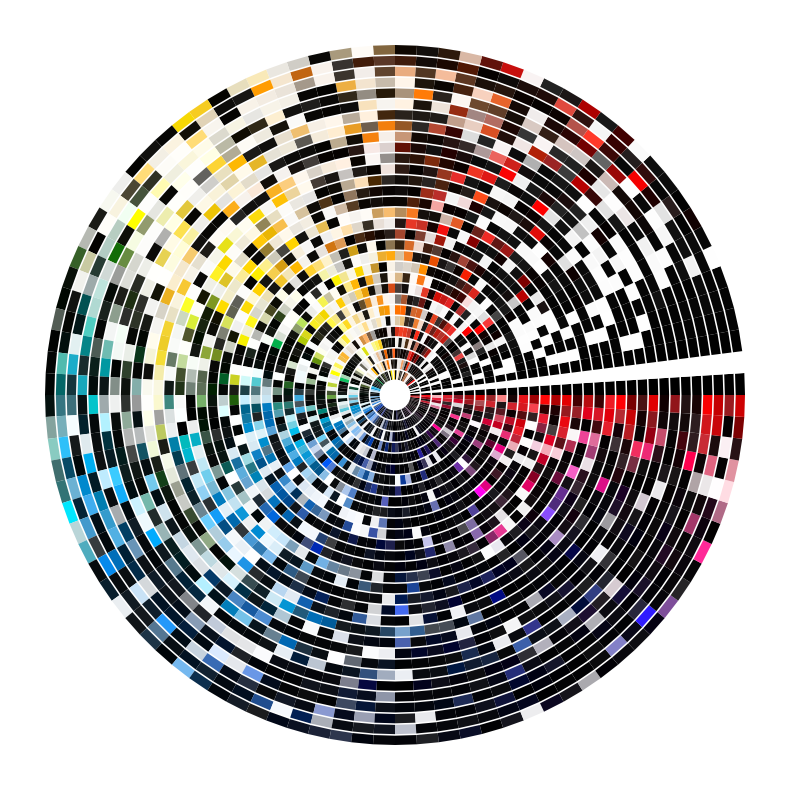

In [19]:
import os
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

# Leer el CSV combinado
combined_csv_path = r'C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\proyecto con el tito cosme\combined_dominant_colors.csv'
df = pd.read_csv(combined_csv_path)

# Convertir colores hexadecimales a HSV y añadir componentes por separado al DataFrame
df['HSV'] = df['Color'].apply(lambda x: mcolors.rgb_to_hsv(mcolors.hex2color(x)))
df['Hue'] = df['HSV'].apply(lambda x: x[0])
df['Saturation'] = df['HSV'].apply(lambda x: x[1])
df['Value'] = df['HSV'].apply(lambda x: x[2])

# Ordenar por año y luego por Hue
df = df.sort_values(by=['Year', 'Hue'])

# Remover las columnas HSV, Saturation y Value después de ordenar
df = df.drop(columns=['HSV', 'Saturation', 'Value'])

# Función para crear los aros de colores
def plot_color_ring(ax, colors, radius, width):
    # Crear los ángulos para cada color
    num_colors = len(colors)
    theta = np.linspace(0, 2 * np.pi, num_colors, endpoint=False)
    
    # Crear el polígono para cada color
    for i, color in enumerate(colors):
        theta1, theta2 = theta[i], theta[(i + 1) % num_colors]
        verts = [
            (radius * np.cos(theta1), radius * np.sin(theta1)),
            ((radius + width) * np.cos(theta1), (radius + width) * np.sin(theta1)),
            ((radius + width) * np.cos(theta2), (radius + width) * np.sin(theta2)),
            (radius * np.cos(theta2), radius * np.sin(theta2)),
            (radius * np.cos(theta1), radius * np.sin(theta1))
        ]
        ax.fill(*zip(*verts), color=color, edgecolor='none')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
ax.axis('off')

# Parámetros de los aros
years = df['Year'].unique()
inner_radius = 0.5
width = 0.3
spacing = 0.05  # Espaciado entre aros

# Dibujar los aros para cada año
for i, year in enumerate(years):
    colors = df[df['Year'] == year]['Color'].tolist()
    plot_color_ring(ax, colors, inner_radius + i * (width + spacing), width)

# Mostrar el gráfico
plt.show()

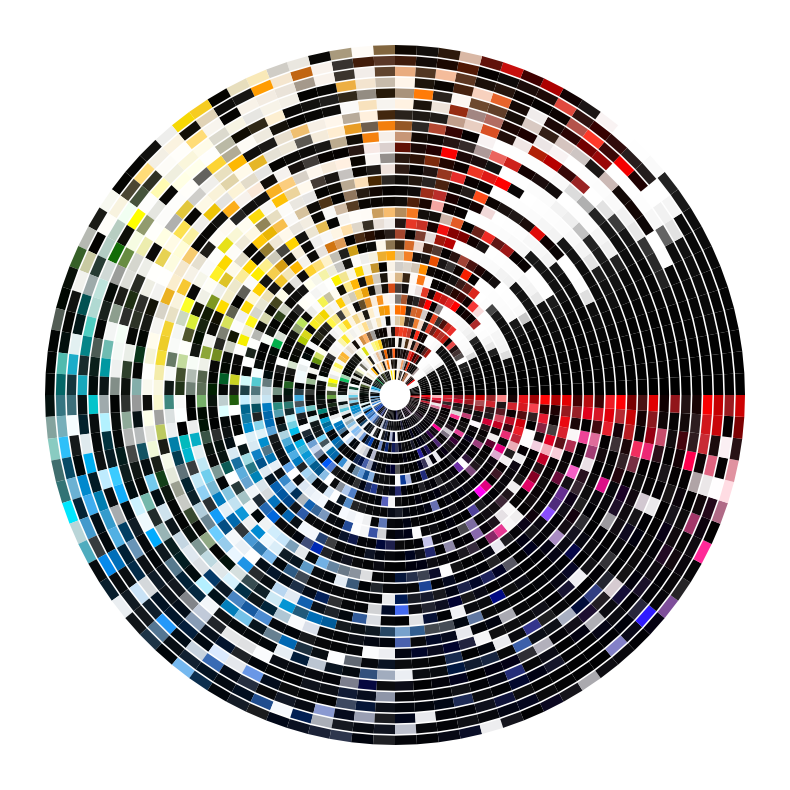

In [20]:
import os
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

# Leer el CSV combinado
combined_csv_path = r'C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\proyecto con el tito cosme\combined_dominant_colors.csv'
df = pd.read_csv(combined_csv_path)

# Convertir colores hexadecimales a HSV y añadir componentes por separado al DataFrame
df['HSV'] = df['Color'].apply(lambda x: mcolors.rgb_to_hsv(mcolors.hex2color(x)))
df['Hue'] = df['HSV'].apply(lambda x: x[0])
df['Saturation'] = df['HSV'].apply(lambda x: x[1])
df['Value'] = df['HSV'].apply(lambda x: x[2])

# Ordenar por año, luego por Hue, Saturation y Value
df = df.sort_values(by=['Year', 'Hue', 'Saturation', 'Value'])

# Remover las columnas HSV, Saturation y Value después de ordenar
df = df.drop(columns=['HSV', 'Saturation', 'Value'])

# Función para crear los aros de colores
def plot_color_ring(ax, colors, radius, width):
    # Crear los ángulos para cada color
    num_colors = len(colors)
    theta = np.linspace(0, 2 * np.pi, num_colors, endpoint=False)
    
    # Crear el polígono para cada color
    for i, color in enumerate(colors):
        theta1, theta2 = theta[i], theta[(i + 1) % num_colors]
        verts = [
            (radius * np.cos(theta1), radius * np.sin(theta1)),
            ((radius + width) * np.cos(theta1), (radius + width) * np.sin(theta1)),
            ((radius + width) * np.cos(theta2), (radius + width) * np.sin(theta2)),
            (radius * np.cos(theta2), radius * np.sin(theta2)),
            (radius * np.cos(theta1), radius * np.sin(theta1))
        ]
        ax.fill(*zip(*verts), color=color, edgecolor='none')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
ax.axis('off')

# Parámetros de los aros
years = df['Year'].unique()
inner_radius = 0.5
width = 0.3
spacing = 0.05  # Espaciado entre aros

# Dibujar los aros para cada año
for i, year in enumerate(years):
    colors = df[df['Year'] == year]['Color'].tolist()
    plot_color_ring(ax, colors, inner_radius + i * (width + spacing), width)

# Mostrar el gráfico
plt.show()

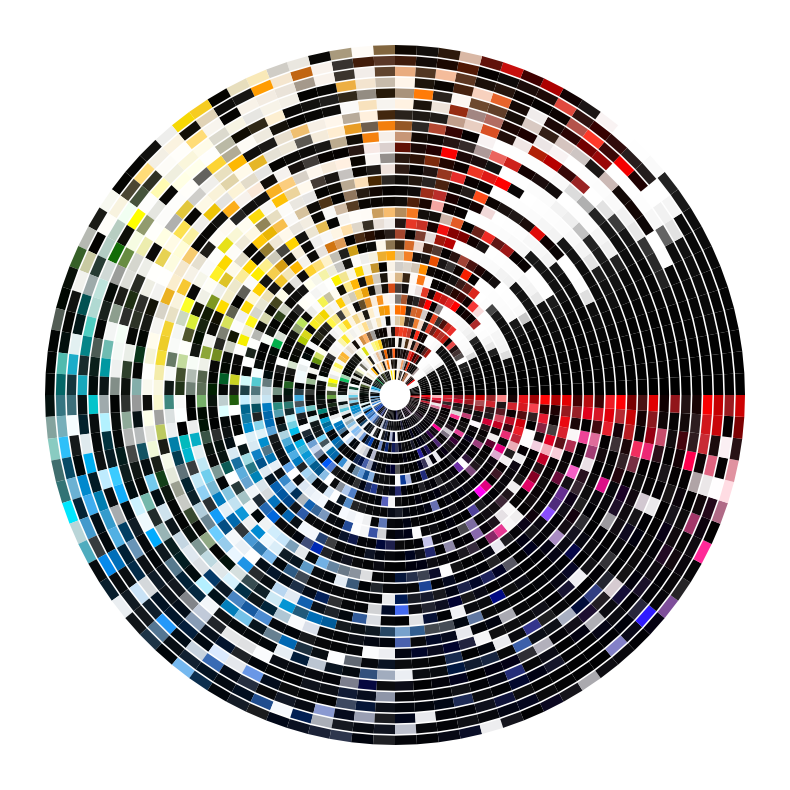

In [27]:
import os
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

# Leer el CSV combinado
combined_csv_path = r'C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\proyecto con el tito cosme\combined_dominant_colors.csv'
df = pd.read_csv(combined_csv_path)

# Convertir colores hexadecimales a HSV y añadir componentes por separado al DataFrame
df['HSV'] = df['Color'].apply(lambda x: mcolors.rgb_to_hsv(mcolors.hex2color(x)))
df['Hue'] = df['HSV'].apply(lambda x: x[0])
df['Saturation'] = df['HSV'].apply(lambda x: x[1])
df['Value'] = df['HSV'].apply(lambda x: x[2])

# Ordenar por año, luego por Hue, Saturation y Value
df = df.sort_values(by=['Year', 'Hue', 'Saturation', 'Value'])

# Remover las columnas HSV, Saturation y Value después de ordenar
df = df.drop(columns=['HSV', 'Saturation', 'Value'])

# Función para crear los aros de colores
def plot_color_ring(ax, colors, radius, width):
    # Crear los ángulos para cada color
    num_colors = len(colors)
    theta = np.linspace(0, 2 * np.pi, num_colors, endpoint=False)
    
    # Crear el polígono para cada color
    for i, color in enumerate(colors):
        theta1, theta2 = theta[i], theta[(i + 1) % num_colors]
        verts = [
            (radius * np.cos(theta1), radius * np.sin(theta1)),
            ((radius + width) * np.cos(theta1), (radius + width) * np.sin(theta1)),
            ((radius + width) * np.cos(theta2), (radius + width) * np.sin(theta2)),
            (radius * np.cos(theta2), radius * np.sin(theta2)),
            (radius * np.cos(theta1), radius * np.sin(theta1))
        ]
        ax.fill(*zip(*verts), color=color, edgecolor='none')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
ax.axis('off')

# Parámetros de los aros
years = df['Year'].unique()
inner_radius = 0.5
width = 0.3
spacing = 0.05  # Espaciado entre aros

# Dibujar los aros para cada año
for i, year in enumerate(years):
    colors = df[df['Year'] == year]['Color'].tolist()
    plot_color_ring(ax, colors, inner_radius + i * (width + spacing), width)

# Guardar el gráfico como SVG
output_file = r'C:\Users\cosme\OneDrive\Escritorio\DATA ELISAVA\proyecto con el tito cosme\proyecto con el tito cosme\color_rings.svg'
plt.savefig(output_file, format='svg')

# Mostrar el gráfico en Jupyter Notebook
plt.show()